##Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○ Write these insights in short point-wise sentences (maximum 100 words per
insight).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [7]:
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left") \
                           .merge(products_df, on="ProductID", how="left")

In [8]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

In [9]:
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])

In [10]:
#region distribution


In [12]:
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
top_categories = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)


In [13]:
customer_distribution = merged_df['Region'].value_counts()

In [14]:
sales_over_time = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()


In [15]:
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)


In [16]:
# Plotting

In [17]:
plt.figure(figsize=(18, 10))

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Asia')])

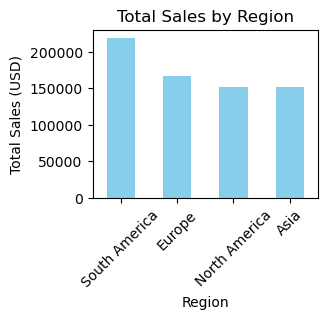

In [19]:
#sales region

plt.subplot(2, 2, 1)
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Home Decor')])

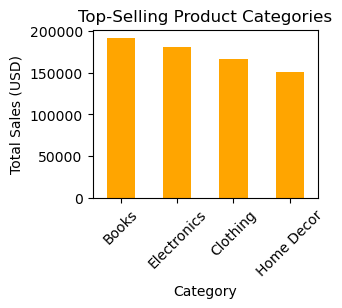

In [20]:
#high categories

plt.subplot(2, 2, 2)
top_categories.plot(kind='bar', color='orange')
plt.title('Top-Selling Product Categories')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Asia')])

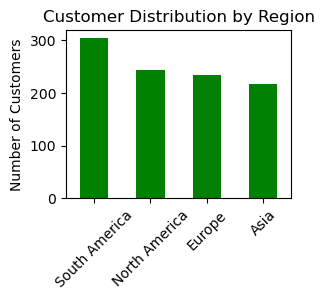

In [21]:
plt.subplot(2, 2, 3)
customer_distribution.plot(kind='bar', color='green')
plt.title('Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

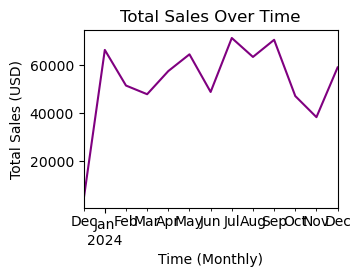

In [22]:
plt.subplot(2, 2, 4)
sales_over_time.plot(color='purple')
plt.title('Total Sales Over Time')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Time (Monthly)')

plt.tight_layout()
plt.show()

In [24]:
# Display all insights

print("Sales by Region:\n", region_sales)
print("\nTop-Selling Product Categories:\n", top_categories)
print("\nCustomer Distribution by Region:\n", customer_distribution)
print("\nSales Over Time (First 5 Months):\n", sales_over_time.head())
print("\nTop 10 Customers by Revenue:\n", top_customers)

Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

Top-Selling Product Categories:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Customer Distribution by Region:
 South America    304
North America    244
Europe           234
Asia             218
Name: Region, dtype: int64

Sales Over Time (First 5 Months):
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
Freq: M, Name: TotalValue, dtype: float64

Top 10 Customers by Revenue:
 CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eat